In [16]:
##Import required packages to use
import sys
import time
from datetime import datetime, timedelta
from operator import itemgetter   
import pandas as pd

In [17]:
## Create a function to time the entire process
Start_time = time.clock()    

def GetTime():
    sec = timedelta(seconds=(time.clock() - Start_time))
    d = datetime(1,1,1,0) + sec

    x=("%d:%d:%d:%d" % (d.hour, d.minute, d.second,d.microsecond/1000))
    return x

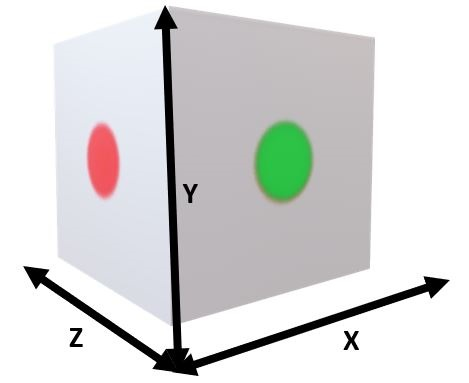

In [18]:

## Create a class function to turn a cube along any of the x-y-z axis
class TurnCube:

    def __init__(self, Cube):
        self.Cube = Cube

    def printcube(self):
        return self.Cube

    @classmethod
    def TurnDown(cls, cubename): ## Rotate cube down along the y and z -axes
        Cube = cubename[1:4]+[cubename[0]]+cubename[4:7]
        return Cube
    
    @classmethod
    def TurnUp(cls, cubename):  ## Rotate cube up along the y and z -axes
        Cube = list(itemgetter(3,2,1,0,4,5)(cubename))
        return Cube
    
    @classmethod
    def TurnRight(cls, cubename): ## Rotate cube right along the x and z -axes
        Cube = list(itemgetter(4,1,5,3,2,0)(cubename))
        return Cube
    
    @classmethod
    def TurnLeft(cls, cubename): ## Rotate cube left along the x and z -axes
        Cube = list(itemgetter(5,1,4,3,0,2)(cubename))
        return Cube


    @classmethod
    def TurnDownRight(cls, cubename): ## Rotate cube down and right along the x and y -axes
        Cube = list(itemgetter(0,4,2,5,3,1)(cubename))
        return Cube

    @classmethod
    def TurnUpLeft(cls, cubename): ## Rotate cube left and up along the x and y -axes
        Cube = list(itemgetter(0,5,2,4,1,3)(cubename))
        return Cube



In [19]:
## initialize each cube
cube=[["Red","Red","Red","Green","Blue","Yellow"],            ##cube 1
      ["Blue","Red","Red","Yellow","Green","Yellow"],         ##cube 2
      ["Blue","Blue","Red","Yellow","Green","Green"],         ##cube 3
      ["Red","Green","Green","Yellow","Blue","Yellow"]]       ##cube 4

## Create an instance of each cube in our "TurnCube" Class
Cube1=TurnCube(cube[0]) 
Cube2=TurnCube(cube[1])
Cube3=TurnCube(cube[2])
Cube4=TurnCube(cube[3])
Cubes=[Cube1,Cube2,Cube3,Cube4]

In [20]:
## For each cube, rotate the cube such that each side of the cube is oriented to face the front only once.  
a=[[] for _ in range(4)]
for i in range(0,4):
    a[i]=[TurnCube(TurnCube.TurnDown(Cubes[i].Cube)),  TurnCube(TurnCube.TurnUp(Cubes[i].Cube)),
      TurnCube(TurnCube.TurnLeft(Cubes[i].Cube)) ,  TurnCube(TurnCube.TurnRight(Cubes[i].Cube)),
      TurnCube(TurnCube.TurnUpLeft(Cubes[i].Cube)), TurnCube(TurnCube.TurnDownRight(Cubes[i].Cube))]

In [21]:
## Crom above, get every unique orientation. Given this is a cube, there are 24 unique oraiteations per cube. 
## NOTE: Because ew are stacking the cubes side-by-side, the fouth cube only has 6 degrees of freedom rather 24. 
## Thise becomes more clean in the next cell.
combo=[]
for h in range(0,4):
    for i in range(0,6):
        Cubes[h]=a[h][i]
        if h<3:
            for j in range(0,4):
                Cubes[h]=TurnCube(TurnCube.TurnDown(Cubes[h].Cube))
                combo.append(Cubes[h].printcube())
        else:
            Cubes[h]=Cubes[h]
            combo.append(Cubes[h].printcube())

combo1=combo[0:24]
combo2=combo[24:48]
combo3=combo[48:72]
combo4=combo[72:78]

In [22]:
for i in range(0,6): ## This cube has 6 degrees of freedome.  
    for j in range(0,24): ## This cube has 24 degrees of freedome.  
        for k in range(0,24): ## This cube has 24 degrees of freedome.  
            for l in range(0,24): ## This cube has 24 degrees of freedome.        
                Check=[combo1[l]]+[combo2[k]]+[combo3[j]]+[combo4[i]]
                if ((len(set([Check[0][0],Check[1][0],Check[2][0],Check[3][0]]))==4) and 
                    (len(set([Check[0][1],Check[1][1],Check[2][1],Check[3][1]]))==4) and 
                    (len(set([Check[0][2],Check[1][2],Check[2][2],Check[3][2]]))==4) and 
                    (len(set([Check[0][3],Check[1][3],Check[2][3],Check[3][3]]))==4)):
                    break ## break the loop if we find an orientation where each colour appreas 
                          ## once on each of the  4 sides.
            else:
                continue # Continue if the inner loop wasn't broken.
            break # only executed if the inner loop DID break
        else:
            continue # Continue if the inner loop wasn't broken.
        break # only executed if the inner loop DID break
    else:
        continue # Continue if the inner loop wasn't broken.
    break # only executed if the inner loop DID break

                

In [23]:
i += 1; j += 1; k += 1; l += 1
print(i,j,k,l,i*j*k*l)  ##Print the bumber of orientations checked before we reached the solution.

## print the final layout of the 4 cubes
pd.DataFrame(Check,columns=['Front',"Top","Back","Bottom","Left","Right"],
                index=["Cube 1","Cube 2","Cube 3", "Cube 4"])


1 8 20 9 1440


,Front,Top,Back,Bottom,Left,Right
Cube 1,Red,Blue,Green,Yellow,Red,Red
Cube 2,Blue,Yellow,Red,Green,Red,Yellow
Cube 3,Yellow,Red,Blue,Blue,Green,Green
Cube 4,Green,Green,Yellow,Red,Blue,Yellow


In [25]:
## print the total time it took the entire prpgram to execute.
print("\x1b[1;92mYou are done!")
print("\x1b[1;92mTime Elapsed: \x1b[1;92m", '\x1b[1;32m'+(GetTime())+'\x1b[1;32m')

You are done!
Time Elapsed:  0:0:13:600
